In [57]:
import numpy as np
from scipy.stats import bernoulli
from matplotlib import pyplot as plt

## Q1. Load the file "sample_1.npy" and convert it to a binary array
- This is simply a Numpy array of previous tosses of a single coin
- Convert it to 0/1's instead of H/T's

In [45]:
sample = np.load('sample_1.npy')
sample = np.where(sample=='H',1,0)

In [46]:
sample

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

## Q2. Answer the following
- How many coin tosses do we have recorded?
- How many "heads" are there in total?
- What is the maximum number of consecutive "heads" appearing together?

In [48]:
n = sample.size
n

1000

In [83]:
heads_total = np.count_nonzero(sample == 1)
heads_total

620

In [47]:
a = np.concatenate([np.cumsum(c) if c[0] == 1 else c for c in np.split(sample, 1 + np.where(np.diff(sample))[0])])
max(a)

15

In [29]:
max_running = ... #number of max running heads

## Q3: Find the MLE estimate for $\theta$ 
- $\theta$ is the probability of head showing in a single toss

In [84]:
theta_hat = np.mean(sample)
theta_hat

0.62

## Q4: Load the file "sample_2.npy"
- You analyze a new coin, where there are 1 million tosses of the same coin where the true $\theta$ value is $0.97$
- Here "1" stands for "head"

In [53]:
sample_2 =  np.load('sample_2.npy')
sample_2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Q5: After how many tosses, your MLE estimate is within $[0.97001, 0.96999]$ 
- report the minimum number that satisfies this

In [80]:
ratios = np.cumsum(sample_2) / (np.arange(1,pow(10,6)+ 1)) #running ratios. ratios[10] would give us hat_theta(9)
np.count_nonzero((ratios<=0.97001) & (ratios>=0.96999))

1969

In [82]:
 np.where(ratios<=0.97001)

(array([  5290,   5291,   5292, ..., 999997, 999998, 999999], dtype=int64),)

In [74]:

# Create an empty list
filter_arr = []

# go through each element in arr
for element in ratios:
  # if the 0.97001 is higher than 42, set the value to True, otherwise False:
  if element > 97001:
    filter_arr.append(True)
  else:
    filter_arr.append(False)


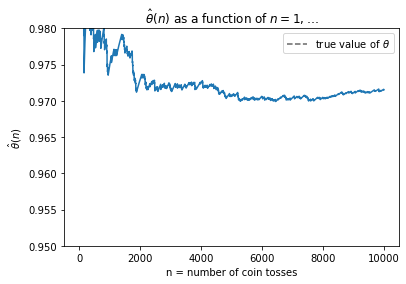

In [69]:
plot_limit = 10000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) 
y = ratios[:plot_limit]
plt.title(r"$\hat{\theta}(n)$ as a function of $n=1,\ldots$") 
plt.xlabel("n = number of coin tosses") 
plt.ylabel(r"$\hat{\theta}(n)$") 
plt.axhline(y = 0.6, color = 'k', linestyle='--', alpha = 0.6, label = r"true value of $\theta$")
plt.plot(x,y) 
# plt.xlim(-5,plot_limit)
plt.ylim(0.95,0.98)
plt.legend()
plt.show()

In [76]:
smallest_accurate_n = min(ratios)
smallest_accurate_n

0.969489047786327

## Submission:
- Please submit your answers for `n`, `heads_total`, `max_running`, `theta_hat` for the questions related to "sample_1.npy"
- Please submit your answer for `smallest_accurate_n` for the question replated to "sample_2.npy"